In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
np.random.seed(42)

Get Data, and Define save_fig function

In [177]:
tarPath = '/Users/titus/tcfst_class/tcfst_course/traffic-accident-project/'\
            'tc-project/idef2_data_set保險業者/idef2_data.csv'

idef2_data = pd.read_csv(tarPath)

In [91]:
IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Quick Look

In [178]:
df.head()

,發生日期,發生時間,事故類別名稱,天候名稱,光線名稱,道路類別-第1當事者-名稱,速限-第1當事者,道路型態大類別名稱,路面狀況-路面鋪裝名稱,路面狀況-路面狀態名稱,...,肇因研判子類別名稱-個別[搶(闖)越平交道],肇因研判子類別名稱-個別[燈光系統故障],肇因研判子類別名稱-個別[交通指揮不當],肇因研判子類別名稱-個別[方向操縱系統故障],肇因研判子類別名稱-個別[未待車輛停妥而上下車],肇因研判子類別名稱-個別[暗處停車無燈光、標識],肇因研判子類別名稱-個別[頭手伸出車外而肇事],經度,緯度,五百公尺內有無照相機
0,20200101.0,56.0,A2,晴,夜間(或隧道、地下道、涵洞)有照明,市區道路,50.0,交岔路,柏油,乾燥,...,0,0,0,0,0,0,0,121.207980,25.005826,False
1,20200101.0,100.0,A2,晴,夜間(或隧道、地下道、涵洞)有照明,市區道路,50.0,單路部分,柏油,乾燥,...,0,0,0,0,0,0,0,120.439800,22.710880,True
2,20200101.0,425.0,A2,晴,夜間(或隧道、地下道、涵洞)有照明,市區道路,50.0,交岔路,柏油,乾燥,...,0,0,0,0,0,0,0,120.965928,24.812959,False
3,20200101.0,500.0,A2,晴,夜間(或隧道、地下道、涵洞)有照明,市區道路,50.0,單路部分,柏油,乾燥,...,0,0,0,0,0,0,0,120.183415,22.930683,False
4,20200101.0,600.0,A2,陰,夜間(或隧道、地下道、涵洞)有照明,市區道路,50.0,交岔路,柏油,濕潤,...,0,0,0,0,0,0,0,121.214405,24.940303,False


In [93]:
idef2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720608 entries, 0 to 720607
Columns: 162 entries, 發生日期 to 五百公尺內有無照相機
dtypes: bool(1), float64(5), int64(138), object(18)
memory usage: 885.8+ MB


In [94]:
idef2_data['死亡人數'].value_counts()

0    716997
1      3525
2        80
3         3
6         2
4         1
Name: 死亡人數, dtype: int64

In [95]:
idef2_data['受傷人數'].value_counts()

1     512204
2     175552
3      25614
4       3654
0       2545
5        657
6        226
7         85
8         31
9         13
10        10
13         5
11         3
14         2
19         2
43         1
24         1
20         1
12         1
39         1
Name: 受傷人數, dtype: int64

In [96]:
idef2_data.describe()

,發生日期,發生時間,速限-第1當事者,當事者區分-類別-大類別名稱-車種[小客車],當事者區分-類別-大類別名稱-車種[機車],當事者區分-類別-大類別名稱-車種[人],當事者區分-類別-大類別名稱-車種[軍車],當事者區分-類別-大類別名稱-車種[小貨車(含客、貨兩用)],當事者區分-類別-大類別名稱-車種[慢車],當事者區分-類別-大類別名稱-車種[大貨車],...,肇因研判子類別名稱-個別[吸食違禁物後駕駛失控],肇因研判子類別名稱-個別[搶(闖)越平交道],肇因研判子類別名稱-個別[燈光系統故障],肇因研判子類別名稱-個別[交通指揮不當],肇因研判子類別名稱-個別[方向操縱系統故障],肇因研判子類別名稱-個別[未待車輛停妥而上下車],肇因研判子類別名稱-個別[暗處停車無燈光、標識],肇因研判子類別名稱-個別[頭手伸出車外而肇事],經度,緯度
count,7.206080e+05,720608.000000,720608.000000,720608.000000,720608.000000,720608.000000,720608.000000,720608.000000,720608.000000,720608.000000,...,720608.000000,720608.000000,720608.000000,720608.000000,720608.000000,720608.000000,720608.00000,720608.000000,720608.000000,720608.000000
mean,2.020565e+07,135263.311887,46.692754,0.532421,1.210310,0.191029,0.000151,0.095328,0.063884,0.013830,...,0.000069,0.000042,0.000060,0.000065,0.000157,0.000101,0.00009,0.000008,120.862178,24.078612
std,5.007907e+03,50493.618959,11.057781,0.604734,0.666813,0.463546,0.012410,0.305362,0.252228,0.119568,...,0.008656,0.006452,0.007725,0.008412,0.012521,0.010064,0.01047,0.002886,0.514318,0.910209
min,2.020010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,118.220128,21.903400
25%,2.020071e+07,92800.000000,40.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,120.422059,23.063775
50%,2.020123e+07,134758.000000,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,120.699325,24.169894
75%,2.021070e+07,174531.000000,50.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,121.335487,24.975109
max,2.021123e+07,235959.000000,850.000000,10.000000,29.000000,44.000000,2.000000,6.000000,14.000000,4.000000,...,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,4.00000,1.000000,124.665592,26.369950


Visualizing Data

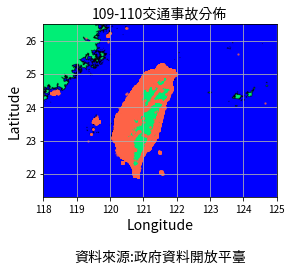

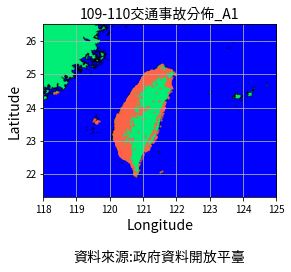

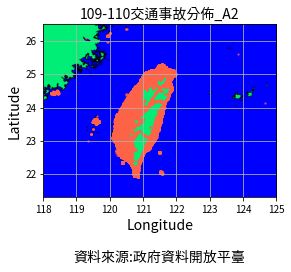

In [97]:
# 發現有些位置不太合理, 後面刪掉離群值再來觀察看看.
df = idef2_data.copy()
filename = 'images/taiwan118-125-213-265.png'
df.plot(kind="scatter", x="經度", y="緯度",color='tomato',
        grid=True, alpha=0.6, s=2)
axis = 118, 125, 21.3, 26.5
tw_img = plt.imread(filename)
# plt.legend(loc='best')
plt.imshow(tw_img, extent=axis)
plt.title('109-110交通事故分佈')
plt.xlabel('Longitude\n\n資料來源:政府資料開放平臺')
plt.ylabel('Latitude')
plt.axis(axis)
save_fig('accident_over_taiwan')
plt.show()

### A1
df[df['事故類別名稱']=="A1"].plot(kind="scatter", x="經度", y="緯度",color='tomato',
        grid=True, alpha=0.6, s=2)
axis = 118, 125, 21.3, 26.5
tw_img = plt.imread(filename)
# plt.legend(loc='best')
plt.imshow(tw_img, extent=axis)
plt.title('109-110交通事故分佈_A1')
plt.xlabel('Longitude\n\n資料來源:政府資料開放平臺')
plt.ylabel('Latitude')
plt.axis(axis)
save_fig('accident_over_taiwan_A1')
plt.show()

### A2
df[df['事故類別名稱']=="A2"].plot(kind="scatter", x="經度", y="緯度",color='tomato',
        grid=True, alpha=0.6, s=2)
axis = 118, 125, 21.3, 26.5
tw_img = plt.imread(filename)
# plt.legend(loc='best')
plt.imshow(tw_img, extent=axis)
plt.title('109-110交通事故分佈_A2')
plt.xlabel('Longitude\n\n資料來源:政府資料開放平臺')
plt.ylabel('Latitude')
plt.axis(axis)
save_fig('accident_over_taiwan_A2')
plt.show()

# **觀察是否有空值**

In [98]:
null_rows_idx = df.isnull().any(axis=1)
df.loc[null_rows_idx].head()

,發生日期,發生時間,事故類別名稱,天候名稱,光線名稱,道路類別-第1當事者-名稱,速限-第1當事者,道路型態大類別名稱,路面狀況-路面鋪裝名稱,路面狀況-路面狀態名稱,...,肇因研判子類別名稱-個別[搶(闖)越平交道],肇因研判子類別名稱-個別[燈光系統故障],肇因研判子類別名稱-個別[交通指揮不當],肇因研判子類別名稱-個別[方向操縱系統故障],肇因研判子類別名稱-個別[未待車輛停妥而上下車],肇因研判子類別名稱-個別[暗處停車無燈光、標識],肇因研判子類別名稱-個別[頭手伸出車外而肇事],經度,緯度,五百公尺內有無照相機


# **類別資料編碼**

Ordinal Encoder, 

In [111]:
for k, v in df.dtypes.items():
    if v in [np.bool_,object]:
        print(f'{k}:{v}')

事故類別名稱:object
天候名稱:object
光線名稱:object
道路類別-第1當事者-名稱:object
道路型態大類別名稱:object
路面狀況-路面鋪裝名稱:object
路面狀況-路面狀態名稱:object
路面狀況-路面缺陷名稱:object
道路障礙-視距名稱:object
號誌-號誌動作名稱:object
車道劃分設施-分向設施大類別名稱:object
車道劃分設施-分向設施子類別名稱:object
車道劃分設施-分道設施-快車道或一般車道間名稱:object
車道劃分設施-分道設施-快慢車道間名稱:object
車道劃分設施-分道設施-路面邊線名稱:object
事故類型及型態大類別名稱:object
肇因研判大類別名稱-主要:object
肇因研判子類別名稱-主要:object
五百公尺內有無照相機:bool


In [124]:
# Ordinal Encoder
df = idef2_data.copy()
cols = [
    '事故類別名稱',
    '天候名稱',
    '光線名稱',
    '道路類別-第1當事者-名稱',
    '道路型態大類別名稱',
    '路面狀況-路面鋪裝名稱',
    '路面狀況-路面狀態名稱',
    '路面狀況-路面缺陷名稱',
    '道路障礙-視距名稱',
    '號誌-號誌動作名稱',
    '車道劃分設施-分向設施大類別名稱',
    '車道劃分設施-分向設施子類別名稱',
    '車道劃分設施-分道設施-快車道或一般車道間名稱',
    '車道劃分設施-分道設施-快慢車道間名稱',
    '車道劃分設施-分道設施-路面邊線名稱',
    '事故類型及型態大類別名稱',
    '肇因研判大類別名稱-主要',
    '肇因研判子類別名稱-主要',
    '五百公尺內有無照相機']

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
cat_encoded = ordinal_encoder.fit_transform(df[cols])

df_output = pd.DataFrame(cat_encoded,
                         columns=ordinal_encoder.get_feature_names_out(),
                         index=df.index)
df[cols] = df_output
df[cols]


,發生日期,發生時間,事故類別名稱,天候名稱,光線名稱,道路類別-第1當事者-名稱,速限-第1當事者,道路型態大類別名稱,路面狀況-路面鋪裝名稱,路面狀況-路面狀態名稱,...,肇因研判子類別名稱-個別[搶(闖)越平交道],肇因研判子類別名稱-個別[燈光系統故障],肇因研判子類別名稱-個別[交通指揮不當],肇因研判子類別名稱-個別[方向操縱系統故障],肇因研判子類別名稱-個別[未待車輛停妥而上下車],肇因研判子類別名稱-個別[暗處停車無燈光、標識],肇因研判子類別名稱-個別[頭手伸出車外而肇事],經度,緯度,五百公尺內有無照相機
0,20200101.0,56.0,1.0,1.0,0.0,3.0,50.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,121.207980,25.005826,0.0
1,20200101.0,100.0,1.0,1.0,0.0,3.0,50.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,120.439800,22.710880,1.0
2,20200101.0,425.0,1.0,1.0,0.0,3.0,50.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,120.965928,24.812959,0.0
3,20200101.0,500.0,1.0,1.0,0.0,3.0,50.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,120.183415,22.930683,0.0
4,20200101.0,600.0,1.0,3.0,0.0,3.0,50.0,0.0,1.0,4.0,...,0,0,0,0,0,0,0,121.214405,24.940303,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720603,20211231.0,151100.0,0.0,3.0,2.0,5.0,50.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,121.565785,23.793596,0.0
720604,20211231.0,151305.0,0.0,3.0,2.0,5.0,50.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,121.044996,22.687199,1.0
720605,20211231.0,153700.0,0.0,1.0,2.0,5.0,30.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,120.731800,22.748787,0.0
720606,20211231.0,180000.0,0.0,1.0,0.0,3.0,60.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,120.297959,22.723317,0.0


One Hot Encoder

In [173]:
from sklearn.preprocessing import OneHotEncoder

cols = ['五百公尺內有無照相機']
cat_encoder = OneHotEncoder(sparse=False)
cat_1hot = cat_encoder.fit_transform(df[cols])

df_output = pd.DataFrame(cat_1hot,
                         columns=cat_encoder.get_feature_names_out(),
                         index=df.index)

df[cat_encoder.get_feature_names_out()] = df_output


(720608, 164)

# **Looking for Correlations**

In [125]:
# 利用IsolationForest看看每個row是不是有離群值.
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(df)

In [158]:
print(outlier_pred.shape)
print(outlier_pred)
print(type(outlier_pred))
len(outlier_pred[outlier_pred<0])
# If you wanted to drop outliers, you would run the following code:
# df = df.iloc[outlier_pred == 1]

(720608,)
[1 1 1 ... 1 1 1]
<class 'numpy.ndarray'>


2930

# **敘述統計**

In [126]:
def status(x) : 
    return pd.Series([x.count(),x.min(),x.idxmin(),x.quantile(.25),x.median(),
                      x.quantile(.75),x.mean(),x.max(),x.idxmax(),x.mad(),x.var(),
                      x.std(),x.skew(),x.kurt()],index=['總數','最小值','最小值位置','25%分位數',
                    '中位數','75%分位數','均值','最大值','最大值位數','平均絕對偏差','變異數','標準差','偏度','峰度'])

In [128]:
#['購買與否','性別','世代','區域','上網次數','每天平均上網時間','轉換率']
cols=['發生日期',
'發生時間',
'速限-第1當事者']
Descriptivestatistics= pd.DataFrame(df[cols].apply(status))
Descriptivestatistics

,發生日期,發生時間,速限-第1當事者
總數,7.206080e+05,7.206080e+05,720608.000000
最小值,2.020010e+07,0.000000e+00,0.000000
最小值位置,0.000000e+00,3.190000e+03,241.000000
25%分位數,2.020071e+07,9.280000e+04,40.000000
中位數,2.020123e+07,1.347580e+05,50.000000
75%分位數,2.021070e+07,1.745310e+05,50.000000
均值,2.020565e+07,1.352633e+05,46.692754
最大值,2.021123e+07,2.359590e+05,850.000000
最大值位數,7.177980e+05,7.019960e+05,192875.000000
平均絕對偏差,4.995062e+03,4.314425e+04,6.971686


# **Correlation**

x彼此之間盡量不要共變

y跟x之間如果將關係數<0.1 建議刪掉

y跟x之間如果將關係數0.4<x<0.7, 如果x多於一個, 建議兩個相乘創造新特徵, 然後刪掉舊特徵

y跟x之間如果將關係數>0.7, 如果x多於一個,建議留一個就好

In [172]:
cols = ['發生日期',
        '發生時間',
        '速限-第1當事者',
        '經度',
        '緯度']
corr_matrix = df.corr()
corr_matrix['受傷人數'].sort_values(ascending=False)[cols]


發生日期       -0.001146
發生時間        0.026405
速限-第1當事者   -0.000442
經度         -0.013867
緯度         -0.021432
Name: 受傷人數, dtype: float64

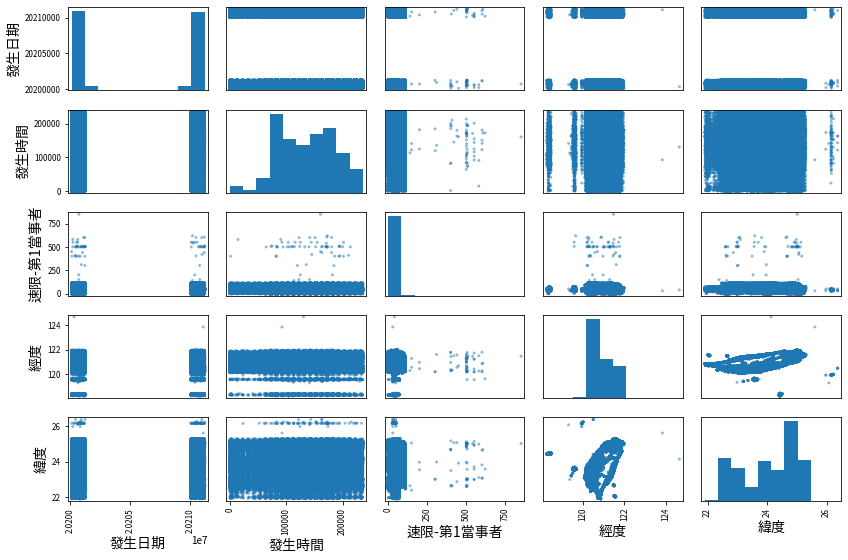

In [171]:
# 用pandas.plotting.scatter_matrix 來觀察關係
from pandas.plotting import scatter_matrix

attributes = ['發生日期',
            '發生時間',
            '速限-第1當事者',
            '經度',
            '緯度']
scatter_matrix(df[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot") # extra code
plt.show()